In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159153,2021-12-07,Pfizer/BioNTech,VEN,70-79,2642,2969,65,39,0,5507,ITH,ITH3,5,Veneto
159154,2021-12-07,Pfizer/BioNTech,VEN,80-89,1036,1628,29,25,0,2610,ITH,ITH3,5,Veneto
159155,2021-12-07,Pfizer/BioNTech,VEN,90+,174,409,3,10,0,570,ITH,ITH3,5,Veneto
159156,2021-12-07,Vaxzevria (AstraZeneca),FVG,60-69,0,1,1,0,0,0,ITH,ITH4,6,Friuli-Venezia Giulia


In [54]:
df1 = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df1

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


In [55]:
df2 = df1.groupby('area')['totale_popolazione'].sum()
df2

area
ABR    1188922
BAS     494881
CAL    1689716
CAM    5104347
EMR    3998406
FVG    1088152
LAZ    5147533
LIG    1399466
LOM    9246804
MAR    1366477
MOL     273317
PAB     465181
PAT     481355
PIE    3927641
PUG    3572053
SAR    1484800
SIC    4435335
TOS    3360763
UMB     790414
VDA     110382
VEN    4383999
Name: totale_popolazione, dtype: int64

In [56]:
dfG =  df.groupby('area', as_index=False)['prima_dose'].sum()
dfG.insert(2, "popolazione_totale", df2.values, True)
dfG

,area,prima_dose,popolazione_totale
0,ABR,990965,1188922
1,BAS,428496,494881
2,CAL,1378242,1689716
3,CAM,4222494,5104347
4,EMR,3471594,3998406
5,FVG,900910,1088152
6,LAZ,4539150,5147533
7,LIG,1185650,1399466
8,LOM,7970608,9246804
9,MAR,1132261,1366477


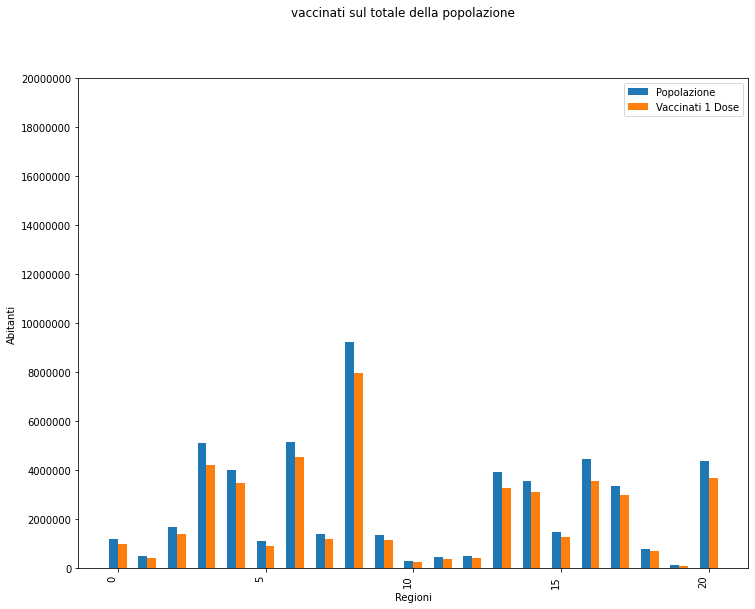

In [57]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes()
fig.suptitle('vaccinati sul totale della popolazione')


ax.bar(dfG.index-0.15, dfG['popolazione_totale'], label="Popolazione", width=0.3)
ax.bar(dfG.index+0.15, dfG['prima_dose'], label="Vaccinati 1 Dose", width=0.3)



fig.autofmt_xdate(rotation=90)


ax.legend(loc=1)

ax.set_xlabel('Regioni')                           
ax.set_ylabel('Abitanti') 

ax.set_ylim([0, 20000000])                              
ax.set_yticklabels(np.arange(0, 20000001, step=2000000))
ax.set_yticks(np.arange(0, 20000001, step=2000000))

#x = np.arange(len(dfG['nome_area']))
#x.item()
#ax.set_xticks(x, dfG['nome_area'])
                          
plt.show()

fig.savefig('Grafico1.png')

In [58]:
dfP = dfG['prima_dose']*100/dfG['popolazione_totale']
dfP

0     83.349875
1     86.585664
2     81.566488
3     82.723490
4     86.824450
5     82.792661
6     88.181076
7     84.721601
8     86.198518
9     82.859865
10    86.970075
11    79.440261
12    85.394356
13    83.598450
14    87.050192
15    85.347926
16    79.735939
17    88.419296
18    86.146880
19    81.042199
20    83.779809
dtype: float64

In [59]:
df3 = df1.groupby('area', as_index=False)[['totale_popolazione']].sum()
df3.insert(2, "Percentuale_Vaccinati_Prima_Dose", dfP.values, True)
df3

,area,totale_popolazione,Percentuale_Vaccinati_Prima_Dose
0,ABR,1188922,83.349875
1,BAS,494881,86.585664
2,CAL,1689716,81.566488
3,CAM,5104347,82.723490
4,EMR,3998406,86.824450
5,FVG,1088152,82.792661
6,LAZ,5147533,88.181076
7,LIG,1399466,84.721601
8,LOM,9246804,86.198518
9,MAR,1366477,82.859865


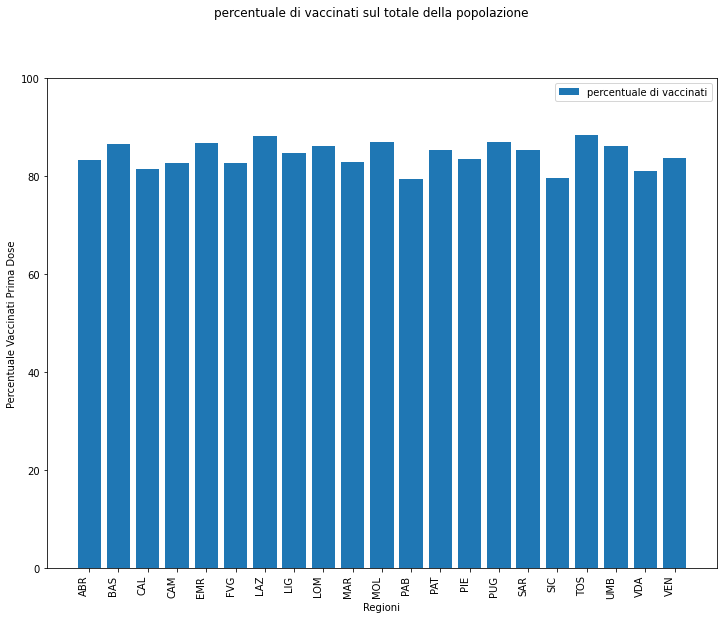

In [60]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes()

fig.suptitle('percentuale di vaccinati sul totale della popolazione')


ax.bar(df3['area'], df3['Percentuale_Vaccinati_Prima_Dose'], label="percentuale di vaccinati")


fig.autofmt_xdate(rotation=90)

ax.legend(loc=1)

ax.set_xlabel('Regioni')                           
ax.set_ylabel('Percentuale Vaccinati Prima Dose') 

ax.set_ylim([0, 100])                              
ax.set_yticks(np.arange(0, 101, step=20))

plt.show()
fig.savefig('Grafico2.png')
